# Importing essential libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore') 
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer

import re 
from wordcloud import WordCloud
from nltk.corpus import stopwords

nltk.download('wordnet')
import pandas as pd

[nltk_data] Downloading package wordnet to /home/datalore/nltk_data...


# Import the dataset 

In [2]:
Stck = pd.read_csv('stock_data.csv')
Stck.head() #Showing the top 5 rows of the dataset 

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [3]:
Stck.describe #Dataset Describing

<bound method NDFrame.describe of                                                    Text  Sentiment
0     Kickers on my watchlist XIDE TIT SOQ PNK CPW B...          1
1     user: AAP MOVIE. 55% return for the FEA/GEED i...          1
2     user I'd be afraid to short AMZN - they are lo...          1
3                                     MNTA Over 12.00            1
4                                      OI  Over 21.37            1
...                                                 ...        ...
5786  Industry body CII said #discoms are likely to ...         -1
5787  #Gold prices slip below Rs 46,000 as #investor...         -1
5788  Workers at Bajaj Auto have agreed to a 10% wag...          1
5789  #Sharemarket LIVE: Sensex off day’s high, up 6...          1
5790  #Sensex, #Nifty climb off day's highs, still u...          1

[5791 rows x 2 columns]>

In [4]:
Stck.tail() #Visualising the last 5 rows ofthe dataset

,Text,Sentiment
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1
5790,"#Sensex, #Nifty climb off day's highs, still u...",1


In [5]:
Stck.shape #Showing the shape of the dataset 

(5791, 2)

In [6]:
Stck.columns #Showing the columns of the dataset

Index(['Text', 'Sentiment'], dtype='object')

In [7]:
#null values checking
Stck.isnull()

,Text,Sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5786,False,False
5787,False,False
5788,False,False
5789,False,False


In [8]:
Stck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [9]:
## Plotting the count of the Sentiment value  
Stck.describe()

,Sentiment
count,5791.000000
mean,0.272664
std,0.962192
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000


# Count plot 

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

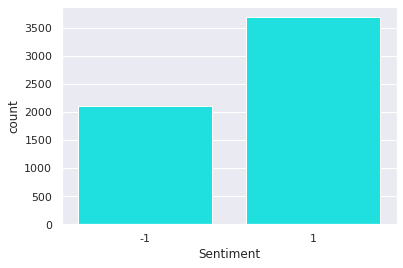

In [10]:
## Plotting the count plot  
sns.countplot(Stck["Sentiment"], color='cyan')

# Pie Plot 

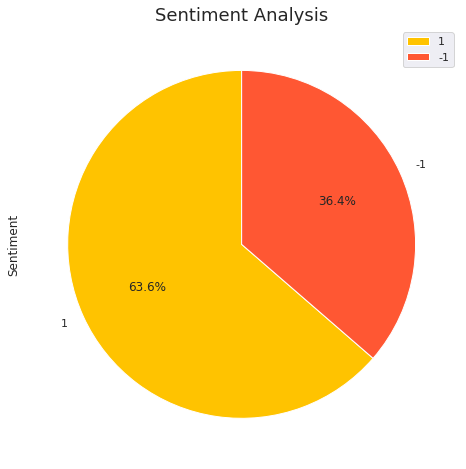

In [11]:

ctg_counts = Stck['Sentiment'].value_counts()

# Defining the specific colors for every category
colors = ['#FFC300', '#FF5733', '#C70039']

# Developing the pie chart
ctg_counts.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90, colors=colors)

plt.title("Sentiment Analysis", fontsize=18)
plt.legend(labels=ctg_counts.index, loc='upper right')
plt.show() #Showing the plot

In [12]:
!pip install nltk #installing the nltk module 


In [13]:
## Sentiment Value count 
Stck["Sentiment"].value_counts()

1 3685
-1 2106
Name: Sentiment, dtype: int64

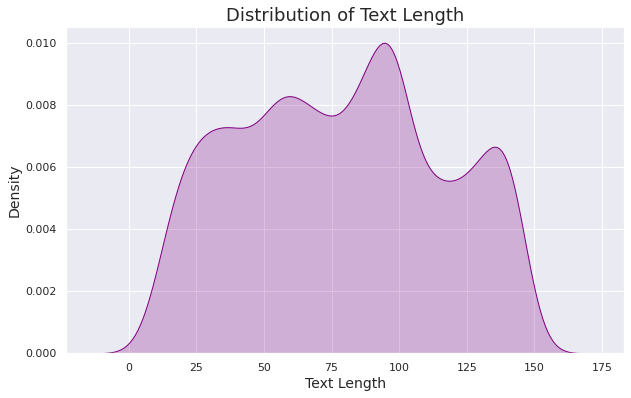

In [14]:
import seaborn as sns

sns.set_style("whitegrid")
sns.set(rc={"figure.figsize":(10,6)})
sns.set_palette("husl")

length = Stck["Text"].str.len()
sns.kdeplot(length, shade=True, color="purple")
plt.title("Distribution of Text Length", fontsize=18) #Titling of the plot 
plt.xlabel("Text Length", fontsize=14) #Labelling the x-axis
plt.ylabel("Density", fontsize=14) #Lalelling the y-axis 
plt.show()


In [15]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datalore/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'y', 'having', 'aren', 'has', 'for', 'if', 'are', "you're", 'yours', 'don', 'she', 'wasn', 'same', "mustn't", 'each', 'herself', 'or', 'can', 'shouldn', "she's", 'those', 'ma', 'so', 'because', 'being', 'its', 'won', 'just', 'above', 'too', "mightn't", 'which', 'an', "you'd", 'more', 'than', 'whom', 'their', 'between', 'been', 'until', 'down', 'didn', 'mightn', 'needn', "you've", 'my', 'you', 'few', 'from', 'at', 'in', 'under', 'did', "couldn't", 'd', 'they', "don't", 'own', "hadn't", 'after', 'now', "you'll", 'our', 'these', 'have', 'yourselves', 'ours', 'that', 'only', 'shan', 'and', 'be', 'all', 'most', 'wouldn', 'other', 'who', 'of', 'was', 'once', 'off', 'how', 'mustn', 'myself', 's', 'ourselves', 'doing', 'o', "won't", 'a', 'why', 'below', 'but', 'no', 'again', 'any', 'does', 'should', 'both', 'them', 'hasn', 'further', "shouldn't", 'her', 'yourself', "weren't", 'theirs', "haven't", 'me', 'on', "aren't", 'your', 'against', "wasn't", 'with', 'couldn', 'as', 'by', 't', 'while', 't

In [17]:
word_list = [word for text in Stck['Text'] for word in text.split()]

In [18]:
from collections import Counter 
wordCounter = Counter(word_list)
countedWordDict = dict(wordCounter)
sortedWordDict = sorted(countedWordDict.items(),key = lambda x : x[1],reverse=True)
sortedWordDict[0:20]

[('the', 1796),
 ('to', 1668),
 ('a', 1280),
 ('on', 1032),
 ('of', 944),
 ('in', 891),
 ('AAP', 884),
 ('for', 868),
 ('and', 850),
 ('is', 811),
 ('-', 728),
 ('at', 541),
 ('this', 461),
 ('it', 454),
 ('I', 453),
 ('up', 357),
 ('user:', 340),
 ('from', 331),
 ('will', 330),
 ('be', 324)]

# Generating Wordcloud 

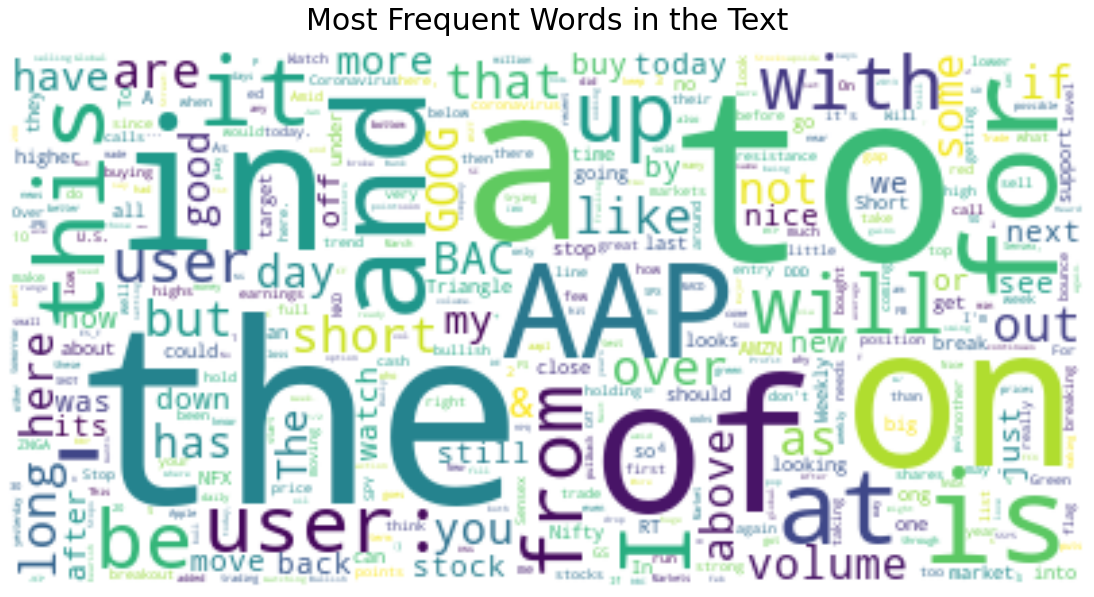

In [19]:

stop_words = set(stopwords.words("english"))
wordcloud = WordCloud(stopwords=stop_words, max_words=2000, background_color="white", min_font_size=3).generate_from_frequencies(countedWordDict)

plt.figure(figsize=[15,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Words in the Text', fontsize=30, pad=20, color='black')
plt.tight_layout(pad=0)
plt.show()

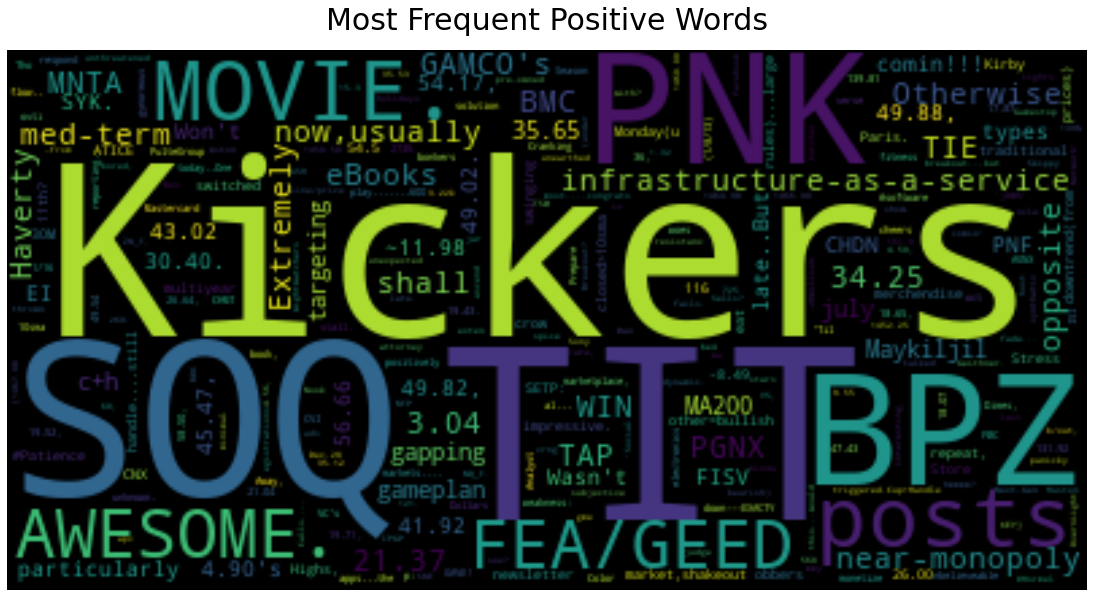

In [20]:
# Filterion out the positive words(1) 
positive_words_dict = {word: count for word, count in countedWordDict.items() if count == 1}

# Developing the wordcloud
wordcloud = WordCloud(stopwords=stop_words, max_words=2000, background_color="black", min_font_size=3).generate_from_frequencies(positive_words_dict)

# Plotting the specific wordcloud
plt.figure(figsize=[15,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Positive Words', fontsize=30, pad=20, color='black')
plt.tight_layout(pad=0)
plt.show()

# Preprocessing of the data 

In [21]:
Stck["Sentiment"] = Stck["Sentiment"].replace(-1,0)

In [22]:
##Checking the specific data again
Stck["Sentiment"].value_counts()

1 3685
0 2106
Name: Sentiment, dtype: int64

# NLP

In [23]:
## Performing NlP Processing
ps = PorterStemmer()
lemma = WordNetLemmatizer()
stopwordSet = set(stopwords.words("english"))

In [24]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Downloading the essential resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialization of the WordNetLemmatizer
lemma = WordNetLemmatizer()

# Defining the particular set of stopwords
stopwordSet = set(stopwords.words("english"))

# Defining the particular function for cleaning the text
def clean_text(text):
    # Removing the non-alphabetic characters and also transform to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenization of the specific text into the words
    words = word_tokenize(text, language="english")
    # Lemmatization of every word and also removing stopwords
    words = [lemma.lemmatize(word) for word in words if word not in stopwordSet]
    # Combining the specific words into the cleaned text
    cleaned_text = " ".join(words)
    return cleaned_text

# Cleaning every text 
text_reviews = [clean_text(text) for text in Stck['Text']]

[nltk_data] Downloading package punkt to /home/datalore/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datalore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/datalore/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
# Generating the bag of words model
cv = CountVectorizer(max_features=1500)

# Apply the bag of words model to the text reviews
X = cv.fit_transform(text_reviews).toarray()

# Obtaining the sentiment labels
y = Stck['Sentiment']

# Splitting the particular dataset into the test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Performing Gradient Boosting Classifier

Accuracy: 0.7394305435720449


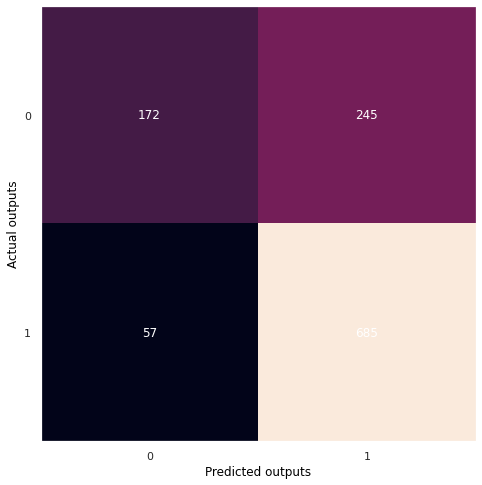

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Initialization of the Gradient Boosting Classifier 
gbc = GradientBoostingClassifier()

# Fitting the model on the following training data
gbc.fit(X_train, y_train)

# Prediction on the test data
y_pred = gbc.predict(X_test)

# Evaluate the accuracy score and printing it
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generating a confusion matrix and ploting it
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', fontsize=12, color='black')
ax.set_ylabel('Actual outputs', fontsize=12, color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

# Decision Tree Classifier 

Accuracy: 0.7014667817083693


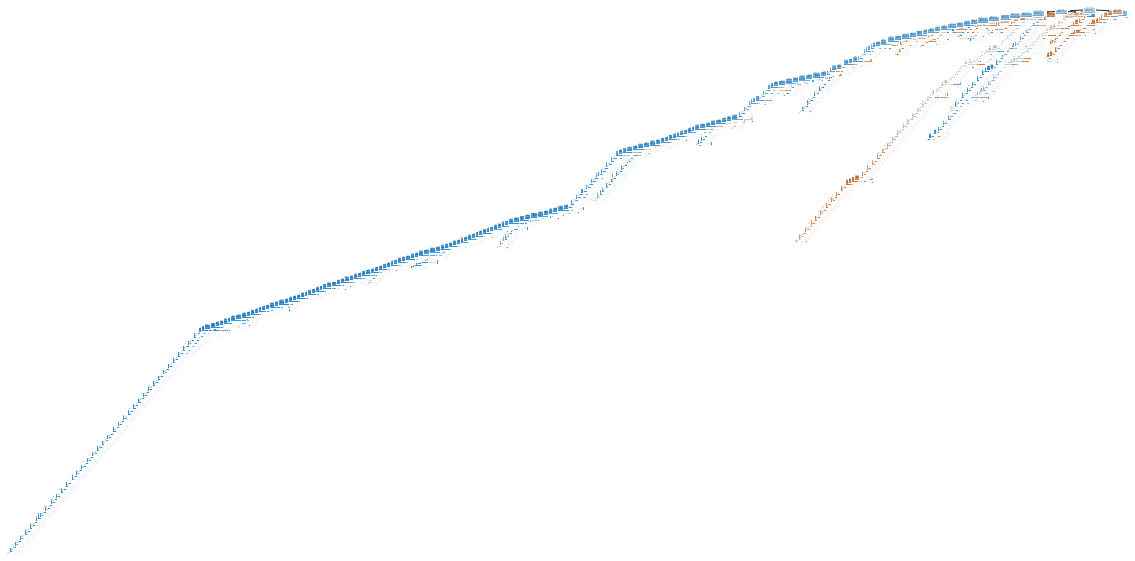

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Generating the model 
dt = DecisionTreeClassifier()

# Fitting the model on the train data
dt.fit(X_train, y_train)

# Predicting on thr test data
y_pred = dt.predict(X_test)

# Evaluate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plotting the decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=[20,10])
plot_tree(dt, filled=True, feature_names=cv.get_feature_names())
plt.show()

In [28]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [29]:
from prettytable import PrettyTable

# Initialization of the following table object and also combine columns
table = PrettyTable()
table.field_names = ["Classifier", "Accuracy"]

# Combinbing rows to the table
table.add_row(["Gradient Boosting Classifier", accuracy_score(y_test, gbc.predict(X_test))])
table.add_row(["Decision Tree Classifier", accuracy_score(y_test, dt.predict(X_test))])

# Printing the table
print(table)

+------------------------------+--------------------+
|          Classifier          |      Accuracy      |
+------------------------------+--------------------+
| Gradient Boosting Classifier | 0.7394305435720449 |
|   Decision Tree Classifier   | 0.7014667817083693 |
+------------------------------+--------------------+
